# Предсказание уровня дохода

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
selected_columns  = data[['age', 'workclass', 'educational-num', 'race', 'gender', 'capital-loss', 'hours-per-week', 'relationship']]

In [4]:
X = pd.get_dummies(selected_columns, columns = ['workclass', 'race', 'gender', 'relationship'])
X.head()

,age,educational-num,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,race_Other,race_White,gender_Female,gender_Male,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,0,40,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,38,9,0,50,0,0,0,0,1,0,...,0,1,0,1,1,0,0,0,0,0
2,28,12,0,40,0,0,1,0,0,0,...,0,1,0,1,1,0,0,0,0,0
3,44,10,0,40,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,18,10,0,30,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [5]:
target = data['income']
target.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: income, dtype: object

In [6]:
le = LabelEncoder()
le.fit( target )
Y = pd.Series( le.transform( data['income'] ) )
Y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.6, random_state = 0)

In [8]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
model.score(X_train, Y_train)

0.8288288288288288

In [10]:
model.score(X_test, Y_test)

0.8297277008121204

In [11]:
predictions = model.predict_proba(X_test)

In [12]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [13]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [14]:
from sklearn.metrics import auc

### Получаем значения AUC 

In [15]:
auc( fpr, tpr )

0.8794630209729986

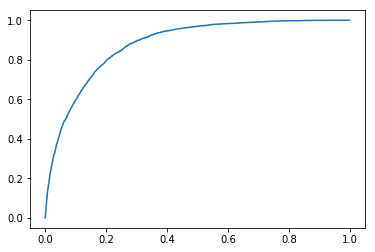

In [16]:
plt.plot( fpr, tpr )